# SHAPELY EXPERIMENTATIONS using a JSON with SHAPES
Import Libraries

## IMPORTS and SETTING INPUTS

In [1]:
import pandas as pd

import json
import geojson

## SELECT ```table``` and ```col_idx``` to work with the pd DataFrame ```pdf``` and ```dict_table_info``` 
To be defined:
1. ```table``` contains the name of the table to be imported
2. ```col_idx``` is the column used to set the index (by default = 'Gebietskennziffer')
Self-generated:
1. ```filename_table``` is the name of the file witht the tabl (i.e. f'{table}_json.json')
2. ```filename_dict_info_table```  is the name of the file with a dictionary with information about the table  (i.e. f'{table}_dict_info.json')
3. ```dict_table_info``` is a dictionary with the table information
4. ```pdf``` contains the pd DataFrame with the table info

In [88]:
table = 'bev_entw_wms'
col_idx = 'Gebietskennziffer'

In [99]:
## 1. ```filename_table``` is the name of the file witht the tabl (i.e. f'{table}_json.json')
filename_table = f'{table}.json'
print(f'filename_table={filename_table}')

## 2. ```filename_dict_info_table```  is the name of the file with a dictionary with information about the table  (i.e. f'{table}_dict_info.json')
filename_dict_info_table = f'{table}_dict_info.json'
print(f'filename_dict_info_table={filename_dict_info_table}')

## 3. ```dict_table_info``` is a dictionary with the table information
# dict_info_table = json.loads(filename_dict_info_table) # load your JSON data
with open(filename_dict_info_table) as f:
    str_info_table = json.load(f)
dict_info_table = json.loads(str_info_table)
print(dict_info_table)
    
## 4. ```pdf``` contains the pd DataFrame with the table info
pdf = pd.read_json(filename_table) # load your JSON data
pdf.set_index(col_idx, inplace=True)
pdf.head()

filename_table=bev_entw_wms.json
filename_dict_info_table=bev_entw_wms_dict_info.json
{'displayFieldName': 'name', 'fieldAliases': {'OBJECTID': 'OBJECTID', 'GF': 'GF', 'GEN': 'GEN', 'BEZ': 'BEZ', 'Gebietskennziffer': 'Gebietskennziffer', 'name': 'name', 'bev_entw': 'bev_entw', 'Shape_Length': 'Shape_Length', 'Shape_Area': 'Shape_Area'}, 'geometryType': 'esriGeometryPolygon', 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}, 'fields': [{'name': 'OBJECTID', 'type': 'esriFieldTypeOID', 'alias': 'OBJECTID'}, {'name': 'GF', 'type': 'esriFieldTypeSmallInteger', 'alias': 'GF'}, {'name': 'GEN', 'type': 'esriFieldTypeString', 'alias': 'GEN', 'length': 60}, {'name': 'BEZ', 'type': 'esriFieldTypeString', 'alias': 'BEZ', 'length': 40}, {'name': 'Gebietskennziffer', 'type': 'esriFieldTypeInteger', 'alias': 'Gebietskennziffer'}, {'name': 'name', 'type': 'esriFieldTypeString', 'alias': 'name', 'length': 8000}, {'name': 'bev_entw', 'type': 'esriFieldTypeDouble', 'alias': 'bev_entw'}, {'name': 

,OBJECTID,GF,GEN,BEZ,name,bev_entw,Shape_Length,Shape_Area,geometry
Gebietskennziffer,,,,,,,,,
1001000,1,4,Flensburg,Stadt,"Flensburg, Stadt",0.93,42942.645976,4.928631e+07,"{'rings': [[[1047812.9755482934, 7327520.13794..."
1002000,2,4,Kiel,Stadt,"Kiel, Landeshauptstadt",0.02,104197.417454,1.123210e+08,"{'rings': [[[1132025.5109637673, 7252280.91177..."
1003000,3,4,Lübeck,Stadt,"Lübeck, Hansestadt",-0.04,146500.145313,2.116850e+08,"{'rings': [[[1210803.7336905643, 7167763.77432..."
1004000,4,4,Neumünster,Stadt,"Neumünster, Stadt",0.18,54387.299285,7.187184e+07,"{'rings': [[[1112687.9725694356, 7198562.47580..."
1051011,5,4,Brunsbüttel,Stadt,"Brunsbüttel, Stadt",-0.59,41451.962294,4.989169e+07,"{'rings': [[[1020175.3439046713, 7159764.20627..."


In [100]:
# pdf.info()
# pdf.describe()

## ***RUN ONLY IF A SUBSET OF CITIES TO BE PROCESSED *** 
### SPECIFY ```l_cities``` to generate ```pdf_cities```

To be defined:
1. ```l_cities```[list(str)] is specified to select a specific City

Self-generated by code:
1. ```dict_ars```[dict(int:str)]
   1. key: ```ARS``` (Amtliche Regional Schluessel) is extracted from ```pdf``` based on ```city```
   2. val: ```city``` (str), assigned from the list ```l_cities```
2. ```l_idx``` [list[int]] with the ARS for the list of cities in ```l_cities```
3. ```pdf_cities``` is a pd DataFrame with
   1. Indices ```pdf_cities.index``` -> given by ```l_idx```
   2. Column ```pdf_cities['GEN']``` -> given by ```l_cities```

In [241]:
l_cities = ['Lindau','Kiel']
city = 'Lindau'

In [242]:
## SINGLE CITY
ars = pdf[pdf['GEN']==city].index.values[0]
print(f'City={city}, ARS={ars}')

City=Lindau, ARS=1058096


In [243]:
## LIST OF CITIES
dict_ars = {}
for i,city in enumerate(l_cities):
    print(f'[{i}/{len(l_cities)}] City={city}')
    ars_city = pdf[pdf['GEN']==city].index.values[0]  ## ARS: Amtliche Regional Schluessel
    print(f'  Adding city={city}, ars={ars_city}')
    dict_ars[ars_city] = city

l_idx = list(dict_ars.keys())
print(f'\nARS of interest={l_idx}')

[0/2] City=Lindau
  Adding city=Lindau, ars=1058096
[1/2] City=Kiel
  Adding city=Kiel, ars=1002000

ARS of interest=[1058096, 1002000]


In [244]:
pdf_cities = pdf[pdf.index.isin(l_idx)]
pdf_cities

,OBJECTID,GF,GEN,BEZ,name,bev_entw,Shape_Length,Shape_Area,geometry
Gebietskennziffer,,,,,,,,,
1002000,2,4,Kiel,Stadt,"Kiel, Landeshauptstadt",0.02,104197.417454,1.123210e+08,"{'rings': [[[1132025.5109637673, 7252280.91177..."
1058096,577,4,Lindau,Gemeinde,Lindau,1.17,26611.644008,2.522492e+07,"{'rings': [[[1107695.3877863928, 7248335.86211..."


## ***CONVERT ONLY SINGLE DICTIONARY TO A GEOMETRY ***
Single DICTIONARY is a ```{rings:[polygon1, ..., polgygonN]}```

A GEOMETRY is either:
1. ```geojson.geometry```
2. ```shapely.geometry.shape```

To be defined:
1. ```geom_column(str)``` is the name of the geometry column (default='geometry')
2. ```geom_key(str)``` is the name of the dict key in ```geom_column``` to parse the geojson (default='rings')

Self-generated by code:
1. ```l_coords``` contains a list of points
2. ```polygon_number``` is the number of elements that the shape consists of
3. ```geojson_poly_city``` is either a (1-geojson.polygon / 2.geojson.MultiPolygon, if polygon_number>1)
4. ```geojson_feature_city``` is the geojson Feature, based on ```geojson_poly_city```
5. ```geom``` is the 'shapely.geometry' generated from ```poly_city```

In [317]:
import shapely
# import shapely.geometry as sg

geom_column = 'geometry' 
geom_key = 'rings'

In [246]:
epsg_code_table = dict_info_table['spatialReference']['latestWkid']
epsg_code_WGS84 = 4326
## EPSG:3857, https://epsg.io/3857, WGS 84 / Pseudo-Mercator -- Spherical Mercator
## EPSG:4326, https://epsg.io/4326, WGS84 - World Geodetic System 1984, used in GPS


print(f'geom_column={geom_column} \ngeom_key={geom_key} \
       \nepsg_code_table={epsg_code_table}  \nepsg_code_WGS84={epsg_code_WGS84}')

geom_column=geometry 
geom_key=rings        
epsg_code_table=3857  
epsg_code_WGS84=4326


In [292]:
l_coords = pdf.loc[ars,geom_column][geom_key]
print(type(l_coords))
polygon_number = len(l_coords)
print(f'Number of polygons={polygon_number}')

for i,polygon in enumerate(l_coords):
    print(f'  [{i+1}/{polygon_number}] Polygon={i+1}, Number of points={len(polygon)}')

## PRETTY PRINT ##
# json_formatted_str = json.dumps(geojson_poly_city, indent=2)
# print(json_formatted_str)

<class 'list'>
Number of polygons=2
  [1/2] Polygon=1, Number of points=135
  [2/2] Polygon=2, Number of points=17


#### ```geojson_geom_city``` [geojson.geometry, dict] is defined by:
1. [REQ] `type` [str] that can be either of this ones [MultiPolygon, Point, Linestring, Linearring, Polygon, MultiPoint, MultiLinestring, MultiPolygon]
   1. Point: POINT (x y)
   2. LineString: LINESTRING (x1 y1, x2 y2, ...)
   3. LinearRing: LINEARRING (x1 y1, x2 y2, ...)
   4. Polygon: POLYGON ((x1 y1, x2 y2, ..., xN yN))
   5. MultiPoint: MULTIPOINT ((x1 y1), (x2 y2), ...)
   6. MultiLineString: MULTILINESTRING ((x1 y1, x2 y2, ...), ...)
   7. MultiPolygon: MULTIPOLYGON (((x1 y1, x2 y2, ...), ...))
3. [REQ] `coordinates` --> Array of Polygons
   1. MultiPolygon = [ Polygon1, ..., PolygonN], where
   2. Polygon = [Point1, ..., PointN], where
   3. Point = [x,y]
4. [OPT] `crs`, a dictionary representing the Coordinate Reference System.
   Its value can be either a JSON object or null.
   If it’s a JSON object, it must conform to the CRS object specification, which includes:

type: 
properties: An object containing CRS-specific properties, such as the EPSG code or a URL referencing the CRS definition.
   1. `properties`, a dictionary with
      1. `code`, [int] for EPSG (https://epsg.io/, #3857, Spherical Mercator, # 4326, WGS84)
      2. `type`, [str] 
         A string indicating the type of CRS (e.g., “name”, “link”, or “undefined”).
         1. An example of a Named CRS
         
            ```{"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } }}```
         2. An example of a Linked CRS
            
            ```{"crs":{"type":"link", "properties":{"href":"http://example.com/crs/42", "type":"proj4"}}}```
         5. An example of EPSG CRS
            ```{"crs": {"properties": {"code": 3857}, "type": "EPSG"}}```

In [301]:
# Create a Polygon/MultiPolygon object using Shapely
if polygon_number==1:
    geojson_geom_city = geojson.Polygon(l_coords)
else:
    geojson_geom_city = geojson.MultiPolygon([l_coords])
    
geojson_geom_city.crs = {"type": "EPSG", "properties": {"code": epsg_code}}

print(type(geojson_geom_city))
print(geojson_geom_city)

<class 'geojson.geometry.MultiPolygon'>
{"coordinates": [[[[1107695.387786, 7248335.862114], [1107911.995961, 7247865.713403], [1108041.267499, 7247757.958733], [1107681.80058, 7247175.67248], [1107623.917104, 7246976.990207], [1107815.353449, 7246909.460575], [1108018.771703, 7247094.982848], [1108064.34128, 7246956.242241], [1108134.793006, 7246739.328606], [1108201.679723, 7246566.000329], [1108251.973243, 7246435.668678], [1108293.993576, 7246247.132016], [1108392.659602, 7246200.878653], [1108469.90824, 7246277.584643], [1108618.979832, 7246215.816434], [1108921.327298, 7246111.929848], [1109050.795711, 7246056.988026], [1109060.124482, 7245717.130338], [1108898.328274, 7245590.621387], [1108925.022513, 7245453.479553], [1108999.251308, 7244904.695899], [1109113.719403, 7244472.963812], [1109058.557212, 7244386.688613], [1108882.689229, 7244215.515598], [1108754.190549, 7243989.718913], [1108551.866156, 7243790.843461], [1108445.794915, 7243544.623444], [1108295.872372, 7243440.53

#### These 2 variables represent a GEOMETRY
1. ```geojson_poly_city```[geojson.geometry, dict]
   1. Is used to transport the information of the shape as a JSON/Dict via ```json.dumps(geojson_poly_city, indent=2)```
3. ```shapely_geom_city``` [shapely.geometry.shape, dict]
   1. Can generate a shape in Python by simply calling ```shapely_geom_city```

MULTIPOLYGON (((1107695.387786 7248335.862114, 1107911.995961 7247865.713403, 1108041.267499 7247757.958733, 1107681.80058 7247175.67248, 1107623.917104 7246976.990207, 1107815.353449 7246909.460575, 1108018.771703 7247094.982848, 1108064.34128 7246956.242241, 1108134.793006 7246739.328606, 1108201.679723 7246566.000329, 1108251.973243 7246435.668678, 1108293.993576 7246247.132016, 1108392.659602 7246200.878653, 1108469.90824 7246277.584643, 1108618.979832 7246215.816434, 1108921.327298 7246111.929848, 1109050.795711 7246056.988026, 1109060.124482 7245717.130338, 1108898.328274 7245590.621387, 1108925.022513 7245453.479553, 1108999.251308 7244904.695899, 1109113.719403 7244472.963812, 1109058.557212 7244386.688613, 1108882.689229 7244215.515598, 1108754.190549 7243989.718913, 1108551.866156 7243790.843461, 1108445.794915 7243544.623444, 1108295.872372 7243440.535118, 1107959.872511 7243029.569698, 1107784.525505 7242892.681225, 1107596.512406 7242618.405663, 1107391.779223 7242520.7652

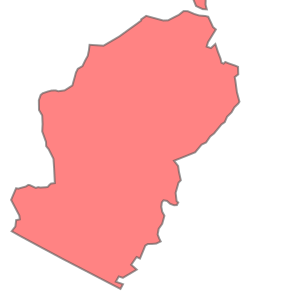

In [319]:
shapely_geom_city = shapely.geometry.shape(geojson_geom_city)
print(shapely_city)
shapely_city

#### ```geojson_feat_city```[dict], a ```geojson.Feature``` is a dictionary defined by 

1. ```type```[str] that is by default 'Feature'
2. ```properties``` [dict] 
3. ```geometry``` [dict] that can be defined by:
    1. ```geojson.geometry```
    2. ```shapely.geometry.shape``` and is described by a 'geometry'

It can be used in a ```folium.Map``` as a layer.

In [323]:
# Convert the LineString to GeoJSON using GeoJSON library
geojson_feature_city = geojson.Feature(geometry=geojson_poly_city, properties={})
# print()
print(type(geojson_feature_city))
print(dir(shapely_city))
print()
print(geojson_feature_city)

<class 'geojson.feature.Feature'>
['__and__', '__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__geo_interface__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__xor__', '_geom', '_geom_prepared', '_ndim', '_repr_svg_', 'almost_equals', 'area', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'contains_properly', 'convex_hull', 'coords', 'covered_by', 'covers', 'crosses', 'difference', 'disjoint', 'distance', 'dwithin', 'envelope', 'equals', 'equals_exact', 'geom_type', 'geometryType', 'geoms', 'has_z', 'hausdorff_distance', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'line_interpolate_point', 'l

In [322]:
print(type(shapely_city))
# print(dir(shapely_city))

## geoms is a list of type <shapely.geometry.Polygon>
print(f'Number of shapes={len(shapely_city.geoms)}')
print(type(shapely_city.geoms[0]) == shapely.geometry.Polygon)
# shapely_city

<class 'shapely.geometry.multipolygon.MultiPolygon'>
Number of shapes=1
True


In [259]:
for i,geom in enumerate(shapely_city.geoms):
    # iterate over the individual polygons in the MultiPolygon
    print(f'[{i+1}/{len(shapely_city.geoms)}]  type={type(geom)}, Number of points={len(geom.exterior.coords)}')

[1/1]  type=<class 'shapely.geometry.polygon.Polygon'>, Number of points=135


In [256]:
print(dir(geom))

['__and__', '__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__geo_interface__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__xor__', '_geom', '_geom_prepared', '_ndim', '_repr_svg_', 'almost_equals', 'area', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'contains_properly', 'convex_hull', 'coords', 'covered_by', 'covers', 'crosses', 'difference', 'disjoint', 'distance', 'dwithin', 'envelope', 'equals', 'equals_exact', 'exterior', 'from_bounds', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'interiors', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'line_interpolate_point', 'line

## WKT (Well-Known Text)
WKT (Well-Known Text) is a format for representing geometric objects, such as points, curves, and surfaces, as text strings. Shapely, a Python package for manipulation and analysis of planar geometric features, supports WKT input and output.

### Converting WKT to Shapely Geometry

To convert a WKT string to a Shapely geometry object, use the ```wkt.loads()``` function:

```
import shapely.wkt

wkt_string = 'POLYGON ((51.0 3.0, 51.3 3.61, 51.3 3.0, 51.0 3.0))'
geom = shapely.wkt.loads(wkt_string)
print(type(geom))  # <class 'shapely.geometry.polygon.Polygon'>
```

In [324]:
print(f'type(geom) = [{type(geom)}]')
print(f'type(geom.wkt) [{type(geom.wkt)}]')

type(geom) = [<class 'shapely.geometry.polygon.Polygon'>]
type(geom.wkt) [<class 'str'>]


In [325]:
print(dir(geom))

['__and__', '__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__geo_interface__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__xor__', '_geom', '_geom_prepared', '_ndim', '_repr_svg_', 'almost_equals', 'area', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'contains_properly', 'convex_hull', 'coords', 'covered_by', 'covers', 'crosses', 'difference', 'disjoint', 'distance', 'dwithin', 'envelope', 'equals', 'equals_exact', 'exterior', 'from_bounds', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'interiors', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'line_interpolate_point', 'line

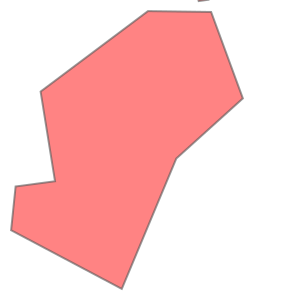

In [326]:
geom.simplify(1000)

In [327]:
geom.area

72972119.51811907

In [328]:
geom.is_closed

False

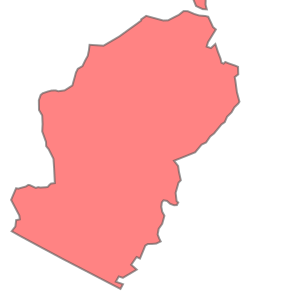

In [329]:
geom

In [330]:
geom.wkt

'POLYGON ((1107695.387786 7248335.862114, 1107911.995961 7247865.713403, 1108041.267499 7247757.958733, 1107681.80058 7247175.67248, 1107623.917104 7246976.990207, 1107815.353449 7246909.460575, 1108018.771703 7247094.982848, 1108064.34128 7246956.242241, 1108134.793006 7246739.328606, 1108201.679723 7246566.000329, 1108251.973243 7246435.668678, 1108293.993576 7246247.132016, 1108392.659602 7246200.878653, 1108469.90824 7246277.584643, 1108618.979832 7246215.816434, 1108921.327298 7246111.929848, 1109050.795711 7246056.988026, 1109060.124482 7245717.130338, 1108898.328274 7245590.621387, 1108925.022513 7245453.479553, 1108999.251308 7244904.695899, 1109113.719403 7244472.963812, 1109058.557212 7244386.688613, 1108882.689229 7244215.515598, 1108754.190549 7243989.718913, 1108551.866156 7243790.843461, 1108445.794915 7243544.623444, 1108295.872372 7243440.535118, 1107959.872511 7243029.569698, 1107784.525505 7242892.681225, 1107596.512406 7242618.405663, 1107391.779223 7242520.765264, 1

## *** CONVERT pd DataFrame column ```geometry```[dict] to a GEOMETRY [shapely.geometry/geojson.geometry]

In [373]:
## Get the polygons outside the dictionary of rings in column `geometry`
pdf['geometry_without_rings'] = pdf['geometry'].apply(lambda x: x.get(geom_key))
pdf['geojson_geometry'] = pdf['geometry_without_rings'].apply(lambda x: geojson.Polygon(x))

## Convert geojson.geometry to a geojson.Feature/shapely.geometry
pdf['geojson_feature'] = pdf['geojson_geometry'].apply(lambda x: geojson.Feature(x))
pdf['shapely_geometry'] = pdf['geojson_geometry'].apply(lambda x: shapely.geometry.shape(x))

# pdf['shapely_geometry2'] = pdf['geojson_geometry'].apply(lambda x: [shapely.geometry.shape(x)])
pdf['shapely_geometry_wkt'] = pdf['shapely_geometry'].apply(lambda x: x.wkt)
pdf['geometry_shapely'] = pdf['shapely_geometry_wkt'].apply(shapely.wkt.loads)
pdf

,OBJECTID,GF,GEN,BEZ,name,bev_entw,Shape_Length,Shape_Area,geometry,geom_shapely,...,geom1,geom2,geom_wkt,geometry_without_rings,geojson_geometry,shapely_geometry,shapely_geometry2,shapely_geometry_wkt,geometry_shapely,geojson_feature
Gebietskennziffer,,,,,,,,,,,,,,,,,,,,,
1001000,1,4,Flensburg,Stadt,"Flensburg, Stadt",0.93,42942.645976,4.928631e+07,"{'rings': [[[1047812.9755482934, 7327520.13794...","[[[1047812.9755482934, 7327520.137946451], [10...",...,"[POLYGON ((1047812.975548 7327520.137946, 1047...","POLYGON ((1047812.975548 7327520.137946, 10478...","POLYGON ((1047812.975548 7327520.137946, 10478...","[[[1047812.9755482934, 7327520.137946451], [10...","{'type': 'Polygon', 'coordinates': [[[1047812....","POLYGON ((1047812.975548 7327520.137946, 10478...","[POLYGON ((1047812.975548 7327520.137946, 1047...","POLYGON ((1047812.975548 7327520.137946, 10478...","POLYGON ((1047812.975548 7327520.137946, 10478...","{'type': 'Feature', 'id': {'type': 'Polygon', ..."
1002000,2,4,Kiel,Stadt,"Kiel, Landeshauptstadt",0.02,104197.417454,1.123210e+08,"{'rings': [[[1132025.5109637673, 7252280.91177...","[[[1132025.5109637673, 7252280.91177244], [113...",...,"[POLYGON ((1132025.510964 7252280.911772, 1132...","POLYGON ((1132025.510964 7252280.911772, 11320...","POLYGON ((1132025.510964 7252280.911772, 11320...","[[[1132025.5109637673, 7252280.91177244], [113...","{'type': 'Polygon', 'coordinates': [[[1132025....","POLYGON ((1132025.510964 7252280.911772, 11320...","[POLYGON ((1132025.510964 7252280.911772, 1132...","POLYGON ((1132025.510964 7252280.911772, 11320...","POLYGON ((1132025.510964 7252280.911772, 11320...","{'type': 'Feature', 'id': {'type': 'Polygon', ..."
1003000,3,4,Lübeck,Stadt,"Lübeck, Hansestadt",-0.04,146500.145313,2.116850e+08,"{'rings': [[[1210803.7336905643, 7167763.77432...","[[[1210803.7336905643, 7167763.774323155], [12...",...,"[POLYGON ((1210803.733691 7167763.774323, 1211...","POLYGON ((1210803.733691 7167763.774323, 12110...","POLYGON ((1210803.733691 7167763.774323, 12110...","[[[1210803.7336905643, 7167763.774323155], [12...","{'type': 'Polygon', 'coordinates': [[[1210803....","POLYGON ((1210803.733691 7167763.774323, 12110...","[POLYGON ((1210803.733691 7167763.774323, 1211...","POLYGON ((1210803.733691 7167763.774323, 12110...","POLYGON ((1210803.733691 7167763.774323, 12110...","{'type': 'Feature', 'id': {'type': 'Polygon', ..."
1004000,4,4,Neumünster,Stadt,"Neumünster, Stadt",0.18,54387.299285,7.187184e+07,"{'rings': [[[1112687.9725694356, 7198562.47580...","[[[1112687.9725694356, 7198562.47580991], [111...",...,"[POLYGON ((1112687.972569 7198562.47581, 11128...","POLYGON ((1112687.972569 7198562.47581, 111287...","POLYGON ((1112687.972569 7198562.47581, 111287...","[[[1112687.9725694356, 7198562.47580991], [111...","{'type': 'Polygon', 'coordinates': [[[1112687....","POLYGON ((1112687.972569 7198562.47581, 111287...","[POLYGON ((1112687.972569 7198562.47581, 11128...","POLYGON ((1112687.972569 7198562.47581, 111287...","POLYGON ((1112687.972569 7198562.47581, 111287...","{'type': 'Feature', 'id': {'type': 'Polygon', ..."
1051011,5,4,Brunsbüttel,Stadt,"Brunsbüttel, Stadt",-0.59,41451.962294,4.989169e+07,"{'rings': [[[1020175.3439046713, 7159764.20627...","[[[1020175.3439046713, 7159764.206279858], [10...",...,"[POLYGON ((1020175.343905 7159764.20628, 10204...","POLYGON ((1020175.343905 7159764.20628, 102047...","POLYGON ((1020175.343905 7159764.20628, 102047...","[[[1020175.3439046713, 7159764.206279858], [10...","{'type': 'Polygon', 'coordinates': [[[1020175....","POLYGON ((1020175.343905 7159764.20628, 102047...","[POLYGON ((1020175.343905 7159764.20628, 10204...","POLYGON ((1020175.343905 7159764.20628, 102047...","POLYGON ((1020175.343905 7159764.20628, 102047...","{'type': 'Feature', 'id': {'type': 'Polygon', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458014,1996,4,Wildeshausen,Stadt,"Wildeshausen, Stadt",1.10,52424.882979,8.964748e+07,"{'rings': 

POLYGON ((1107695.387786 7248335.862114, 1107911.995961 7247865.713403, 1108041.267499 7247757.958733, 1107681.80058 7247175.67248, 1107623.917104 7246976.990207, 1107815.353449 7246909.460575, 1108018.771703 7247094.982848, 1108064.34128 7246956.242241, 1108134.793006 7246739.328606, 1108201.679723 7246566.000329, 1108251.973243 7246435.668678, 1108293.993576 7246247.132016, 1108392.659602 7246200.878653, 1108469.90824 7246277.584643, 1108618.979832 7246215.816434, 1108921.327298 7246111.929848, 1109050.795711 7246056.988026, 1109060.124482 7245717.130338, 1108898.328274 7245590.621387, 1108925.022513 7245453.479553, 1108999.251308 7244904.695899, 1109113.719403 7244472.963812, 1109058.557212 7244386.688613, 1108882.689229 7244215.515598, 1108754.190549 7243989.718913, 1108551.866156 7243790.843461, 1108445.794915 7243544.623444, 1108295.872372 7243440.535118, 1107959.872511 7243029.569698, 1107784.525505 7242892.681225, 1107596.512406 7242618.405663, 1107391.779223 7242520.765264, 11

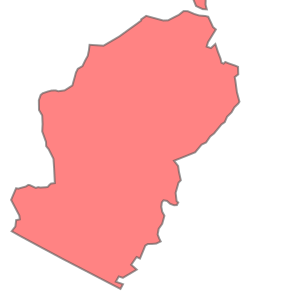

In [502]:
poly_pdf = pdf.loc[ars,'shapely_geometry']
print(poly_pdf)
poly_pdf

## GEOPANDAS


In [503]:
import geopandas as gpd

In [504]:
# epsg_code_table = dict_info_table['spatialReference']['latestWkid']
# epsg_code = 3857
print(f'epsg_code_table={epsg_code_table}')
# epsg_code_WGS84 = 4326
print(f'epsg_code_WGS84={epsg_code_WGS84}')

epsg_code_table=3857
epsg_code_WGS84=4326


In [511]:
del gdf

In [512]:
gdf

NameError: name 'gdf' is not defined

In [513]:

gdf = gpd.GeoDataFrame(pdf, 
                       geometry='shapely_geometry', 
                       crs=f"EPSG:{epsg_code_table}")# Replace with your desired CRS

gdf = gdf.to_crs(epsg=epsg_code_WGS84)
gdf['shapely_geometry_wkt'] = gdf['shapely_geometry'].apply(lambda x: x.wkt)

l_columns_to_drop =['GF','geom1','geom2','geom_wkt', 'geom_shapely_poly', 
                    'geometry_shapely','geometry_without_rings', 
                    'shapely_geometry2', 
                    'geojson_geometry','geojson_feature']
gdf = gdf.drop(columns=l_columns_to_drop)
gdf.head()

,OBJECTID,GEN,BEZ,name,bev_entw,Shape_Length,Shape_Area,geometry_dict,geometry,shapely_geometry,shapely_geometry_wkt,color_column
Gebietskennziffer,,,,,,,,,,,,
1001000,1,Flensburg,Stadt,"Flensburg, Stadt",0.93,42942.645976,4.928631e+07,"{'rings': [[[1047812.9755482934, 7327520.13794...","[[[1047812.9755482934, 7327520.137946451], [10...","POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...","POLYGON ((9.412664108335228 54.82264090758978,...",0.93
1002000,2,Kiel,Stadt,"Kiel, Landeshauptstadt",0.02,104197.417454,1.123210e+08,"{'rings': [[[1132025.5109637673, 7252280.91177...","[[[1132025.5109637673, 7252280.91177244], [113...","POLYGON ((10.16916 54.43138, 10.16957 54.43067...","POLYGON ((10.16915818512172 54.43137670731103,...",0.02
1003000,3,Lübeck,Stadt,"Lübeck, Hansestadt",-0.04,146500.145313,2.116850e+08,"{'rings': [[[1210803.7336905643, 7167763.77432...","[[[1210803.7336905643, 7167763.774323155], [12...","POLYGON ((10.87684 53.98737, 10.87884 53.98595...",POLYGON ((10.87683500043608 53.987365184956204...,-0.04
1004000,4,Neumünster,Stadt,"Neumünster, Stadt",0.18,54387.299285,7.187184e+07,"{'rings': [[[1112687.9725694356, 7198562.47580...","[[[1112687.9725694356, 7198562.47580991], [111...","POLYGON ((9.99545 54.14972, 9.99713 54.14806, ...","POLYGON ((9.995446122146953 54.14971926036184,...",0.18
1051011,5,Brunsbüttel,Stadt,"Brunsbüttel, Stadt",-0.59,41451.962294,4.989169e+07,"{'rings': [[[1020175.3439046713, 7159764.20627...","[[[1020175.3439046713, 7159764.206279858], [10...","POLYGON ((9.16439 53.94509, 9.16706 53.94302, ...","POLYGON ((9.164391039117506 53.94509189228513,...",-0.59


In [514]:
dict_columns_to_rename ={'geometry': 'geometry_polygons', 'shapely_geometry_wkt':'geometry'}
gdf2 = gdf.rename(columns=dict_columns_to_rename)
gdf2.head()

,OBJECTID,GEN,BEZ,name,bev_entw,Shape_Length,Shape_Area,geometry_dict,geometry_polygons,shapely_geometry,geometry,color_column
Gebietskennziffer,,,,,,,,,,,,
1001000,1,Flensburg,Stadt,"Flensburg, Stadt",0.93,42942.645976,4.928631e+07,"{'rings': [[[1047812.9755482934, 7327520.13794...","[[[1047812.9755482934, 7327520.137946451], [10...","POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...","POLYGON ((9.412664108335228 54.82264090758978,...",0.93
1002000,2,Kiel,Stadt,"Kiel, Landeshauptstadt",0.02,104197.417454,1.123210e+08,"{'rings': [[[1132025.5109637673, 7252280.91177...","[[[1132025.5109637673, 7252280.91177244], [113...","POLYGON ((10.16916 54.43138, 10.16957 54.43067...","POLYGON ((10.16915818512172 54.43137670731103,...",0.02
1003000,3,Lübeck,Stadt,"Lübeck, Hansestadt",-0.04,146500.145313,2.116850e+08,"{'rings': [[[1210803.7336905643, 7167763.77432...","[[[1210803.7336905643, 7167763.774323155], [12...","POLYGON ((10.87684 53.98737, 10.87884 53.98595...",POLYGON ((10.87683500043608 53.987365184956204...,-0.04
1004000,4,Neumünster,Stadt,"Neumünster, Stadt",0.18,54387.299285,7.187184e+07,"{'rings': [[[1112687.9725694356, 7198562.47580...","[[[1112687.9725694356, 7198562.47580991], [111...","POLYGON ((9.99545 54.14972, 9.99713 54.14806, ...","POLYGON ((9.995446122146953 54.14971926036184,...",0.18
1051011,5,Brunsbüttel,Stadt,"Brunsbüttel, Stadt",-0.59,41451.962294,4.989169e+07,"{'rings': [[[1020175.3439046713, 7159764.20627...","[[[1020175.3439046713, 7159764.206279858], [10...","POLYGON ((9.16439 53.94509, 9.16706 53.94302, ...","POLYGON ((9.164391039117506 53.94509189228513,...",-0.59


In [515]:
poly_gdf = gdf.loc[ars,'geometry']
# print(poly_gdf)
poly_gdf

[[[1107695.3877863928, 7248335.862113986],
  [1107911.9959614486, 7247865.713402985],
  [1108041.2674988634, 7247757.958733226],
  [1107681.8005797637, 7247175.672480149],
  [1107623.9171035248, 7246976.990206785],
  [1107815.3534492338, 7246909.460575394],
  [1108018.7717031527, 7247094.982848321],
  [1108064.3412797474, 7246956.242240551],
  [1108134.7930058914, 7246739.328605906],
  [1108201.6797226563, 7246566.000329192],
  [1108251.9732433676, 7246435.668677834],
  [1108293.993576372, 7246247.132015758],
  [1108392.6596020397, 7246200.878652979],
  [1108469.908239588, 7246277.584643189],
  [1108618.9798323985, 7246215.816433542],
  [1108921.3272978803, 7246111.9298482295],
  [1109050.7957112975, 7246056.988025503],
  [1109060.1244818, 7245717.130337576],
  [1108898.3282738377, 7245590.621387054],
  [1108925.0225129246, 7245453.479553393],
  [1108999.2513083753, 7244904.695898973],
  [1109113.7194028893, 7244472.963812374],
  [1109058.557212156, 7244386.688613265],
  [1108882.68922

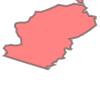

In [516]:
poly_gdf = gdf.loc[ars,'shapely_geometry']
poly_gdf

In [439]:
# # pdf['geom_wkt'] = pdf['geom'].apply(shapely.wkt.loads)

# # df = pd.DataFrame(data)

# # Convert WKT geometry column to Shapely Polygon objects
# # Assuming EPSG:4326 as the CRS

# gdf = gpd.GeoSeries.from_wkt(pdf['geom_wkt']).set_crs(epsg=epsg_code)  

# # Now, gdf is a GeoSeries with Shapely Polygon objects
# print(gdf)

In [440]:
# gdf = gdf.to_crs(epsg=epsg_wgs84)
# gdf

In [442]:
gj_lindau = gdf[gdf.index == ars]#.wkt
gj_lindau
print(type(gj_lindau))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [443]:
# highlight_function = lambda x: {
#     # 'fillColor': 'red',
#                                 # 'color': 'black',
#                                 'lineColor': 'red',
#                                 'fillOpacity': 0.80,
#                                 'weight': 0.1}

# pdf['color_column'] = pdf[sel_column] 

# # Define the custom style function
# def style_fn(feature):
#     value = feature['properties']['color_column']
#     if value < first_lim:
#         return {'fillColor': first_color, 'fillOpacity': 0.5}
#     elif value < second_lim:
#         return {'fillColor': second_color, 'fillOpacity': 0.5}
#     else:
#         return {'fillColor': third_color, 'fillOpacity': 0.5}
        
# gj = folium.GeoJson(
#         data=gdf,
#         nan_fill_opacity=0.1,
#         # style_function=style_function,
#         # style_function=style_fn,
#         # line_color='black',
#         # highlight_function=highlight_function,
#         # tooltip=tooltip
#     )


In [546]:
gjson_gs = gds.to_json()
gds = gpd.GeoSeries.from_wkt(pdf['geom_wkt']).set_crs(epsg=epsg_code).to_crs(epsg=4326)
gds

Gebietskennziffer
1001000    POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...
1002000    POLYGON ((10.16916 54.43138, 10.16957 54.43067...
1003000    POLYGON ((10.87684 53.98737, 10.87884 53.98595...
1004000    POLYGON ((9.99545 54.14972, 9.99713 54.14806, ...
1051011    POLYGON ((9.16439 53.94509, 9.16706 53.94302, ...
                                 ...                        
3458014    POLYGON ((8.35234 52.93973, 8.35313 52.93872, ...
3458001    POLYGON ((8.60631 52.89965, 8.60695 52.8993, 8...
3458002    POLYGON ((8.53184 52.84031, 8.53325 52.84022, ...
3458004    POLYGON ((8.62315 52.94355, 8.62373 52.94284, ...
3458006    POLYGON ((8.6329 53.01406, 8.64328 53.0055, 8....
Length: 2000, dtype: geometry

In [547]:
gdf.head()

,OBJECTID,GEN,BEZ,name,bev_entw,Shape_Length,Shape_Area,geometry_polygons,shapely_geometry,geometry,color_column
Gebietskennziffer,,,,,,,,,,,
1001000,1,Flensburg,Stadt,"Flensburg, Stadt",0.93,42942.645976,4.928631e+07,"[[[1047812.9755482934, 7327520.137946451], [10...","POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...","POLYGON ((9.412664108335228 54.82264090758978,...",0.93
1002000,2,Kiel,Stadt,"Kiel, Landeshauptstadt",0.02,104197.417454,1.123210e+08,"[[[1132025.5109637673, 7252280.91177244], [113...","POLYGON ((10.16916 54.43138, 10.16957 54.43067...","POLYGON ((10.16915818512172 54.43137670731103,...",0.02
1003000,3,Lübeck,Stadt,"Lübeck, Hansestadt",-0.04,146500.145313,2.116850e+08,"[[[1210803.7336905643, 7167763.774323155], [12...","POLYGON ((10.87684 53.98737, 10.87884 53.98595...",POLYGON ((10.87683500043608 53.987365184956204...,-0.04
1004000,4,Neumünster,Stadt,"Neumünster, Stadt",0.18,54387.299285,7.187184e+07,"[[[1112687.9725694356, 7198562.47580991], [111...","POLYGON ((9.99545 54.14972, 9.99713 54.14806, ...","POLYGON ((9.995446122146953 54.14971926036184,...",0.18
1051011,5,Brunsbüttel,Stadt,"Brunsbüttel, Stadt",-0.59,41451.962294,4.989169e+07,"[[[1020175.3439046713, 7159764.206279858], [10...","POLYGON ((9.16439 53.94509, 9.16706 53.94302, ...","POLYGON ((9.164391039117506 53.94509189228513,...",-0.59


In [548]:
print(dir(gdf))

['BEZ', 'GEN', 'OBJECTID', 'Shape_Area', 'Shape_Length', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__geo_interface__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__p

In [549]:
gs = gpd.GeoSeries.from_wkt(gdf['geometry'])
gs

Gebietskennziffer
1001000    POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...
1002000    POLYGON ((10.16916 54.43138, 10.16957 54.43067...
1003000    POLYGON ((10.87684 53.98737, 10.87884 53.98595...
1004000    POLYGON ((9.99545 54.14972, 9.99713 54.14806, ...
1051011    POLYGON ((9.16439 53.94509, 9.16706 53.94302, ...
                                 ...                        
3458014    POLYGON ((8.35234 52.93973, 8.35313 52.93872, ...
3458001    POLYGON ((8.60631 52.89965, 8.60695 52.8993, 8...
3458002    POLYGON ((8.53184 52.84031, 8.53325 52.84022, ...
3458004    POLYGON ((8.62315 52.94355, 8.62373 52.94284, ...
3458006    POLYGON ((8.6329 53.01406, 8.64328 53.0055, 8....
Length: 2000, dtype: geometry

In [484]:
# gdf = gdf.rename(columns={'shapely_geometry_wkt':'geometry'})
gdfs = gdf[['name', 'bev_entw']]#,'geometry']]
gdfs

,name,bev_entw
Gebietskennziffer,,
1001000,"Flensburg, Stadt",0.93
1002000,"Kiel, Landeshauptstadt",0.02
1003000,"Lübeck, Hansestadt",-0.04
1004000,"Neumünster, Stadt",0.18
1051011,"Brunsbüttel, Stadt",-0.59
...,...,...
3458014,"Wildeshausen, Stadt",1.10
3458001,Beckeln,-0.51
3458002,Colnrade,-1.45


## FOLIUM MAPS

In [579]:
first_color = 'green'
second_color = 'yellow'
third_color = 'red'

first_lim = 0.5
second_lim = -0.5

sel_column = 'bev_entw'
print(sel_column)
gdf['color_column'] = gdf[sel_column] 

name_map = sel_column

bev_entw


In [580]:
highlight_function = lambda x: {
    # 'fillColor': 'red',
                                # 'color': 'black',
                                'lineColor': 'red',
                                'fillOpacity': 0.80,
                                'weight': 0.1}

# Define the custom style function
def style_fn(feature):
    value = feature['properties']['color_column']
    if value > first_lim:
        return {'fillColor': first_color, 'fillOpacity': 0.2}
    elif value < second_lim:
        return {'fillColor': second_color, 'fillOpacity': 0.2}
    else:
        return {'fillColor': third_color, 'fillOpacity': 0.2}


In [581]:
tooltip_fields = ['name', 'bev_entw']
tooltip_aliases = ['Gemeinde:', '% Change:']


# Create Folium GeoJsonTooltip object
tooltip = folium.GeoJsonTooltip(fields=tooltip_fields, aliases=tooltip_aliases)

In [583]:
import geopandas as gpd
import folium
import folium.plugins


# Convert to EPSG: 4326 and create GeoJSON object
# gjson = gdf.to_crs(epsg=4326).to_json()
# gjson = gj_lindau.to_crs(epsg=4326).to_json()

# Create Folium map
m = folium.Map([-15.783333, -47.866667], zoom_start=4, tiles='cartodbpositron')


# Add GeoJSON object to the map
gj = folium.GeoJson(
        data=gdf,
        nan_fill_opacity=0.1,
        # style_function=style_function,
        style_function=style_fn,
        # line_color='black',
        highlight_function=highlight_function,
        tooltip=tooltip
    )
# m.add_child(gj)

feature_group2 = folium.FeatureGroup(name='Bevoelkerung Entwicklung [%]')
        #
        # folium.Marker(location=[47.5618,9.7],
        #                               popup='popup',
        #                               icon=icon_company,
        #                               tooltip='tooltip').add_to(feature_group2)
feature_group2.add_child(gj)
m.add_child(feature_group2)


print('Adding fullscreen')
fullscreen = folium.plugins.Fullscreen(position='topleft',
                                       title='Expand me',
                                       title_cancel='Exit me',
                                       force_separate_button=True)
m.add_child(fullscreen)


# Display the map

print('Adding minimap')
m.add_child(folium.plugins.MiniMap())

print('Adding LayerControl')
layercontrol = folium.LayerControl(position='topright',
                                   collapsed=False)
m = m.add_child(layercontrol)
m.fit_bounds(m.get_bounds())

# m

Adding fullscreen
Adding minimap
Adding LayerControl
Map bev_entw.txt saved


In [584]:
f = open(f"{name_map}.txt", "w")
f.write(m._repr_html_())
f.close()
print(f'Map {name_map}.txt saved')

Map bev_entw.txt saved
